In [3]:
from __future__ import print_function
import argparse
import numpy  as np
from PIL import Image
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torch.utils.data.sampler import SubsetRandomSampler
from torchvision import transforms

from data_loaders import Plain_Dataset, eval_data_dataloader
from deep_emotion import Deep_Emotion # calling the Deep_Emotion function
from generate_data import Generate_data # calling the Generate_data function

In [5]:
print(torch.__version__)

1.12.0+cpu


In [2]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
def Train(epochs,train_loader,val_loader,criterion,optmizer,device):
    '''
    Training Loop
    '''
    print("===================================Start Training===================================")
    loss_train = []
    loss_val = []
    accuracy_train = []
    accuracy_val = []
    for e in range(epochs):
        train_loss = 0
        validation_loss = 0
        train_correct = 0
        val_correct = 0
        # Train the model  #
        net.train()
        for data, labels in train_loader:
            data, labels = data.to(device), labels.to(device)
            optmizer.zero_grad()
            outputs = net(data) # passing the data into net
            loss = criterion(outputs,labels)
            loss.backward()
            optmizer.step()
            train_loss += loss.item()
            _, preds = torch.max(outputs,1)
            train_correct += torch.sum(preds == labels.data)
            loss_train.append(train_loss)
            accuracy_train.append(train_correct)

        #validate the model#
        net.eval()
        for data,labels in val_loader:
            data, labels = data.to(device), labels.to(device)
            val_outputs = net(data)
            val_loss = criterion(val_outputs, labels)
            validation_loss += val_loss.item()
            _, val_preds = torch.max(val_outputs,1)
            val_correct += torch.sum(val_preds == labels.data)
            loss_val.append(val_loss)
            accuracy_val.append(val_correct)

        train_loss = train_loss/len(train_dataset)
        train_acc = train_correct.double() / len(train_dataset)
        validation_loss =  validation_loss / len(validation_dataset)
        val_acc = val_correct.double() / len(validation_dataset)
        print('Epoch: {} \tTraining Loss: {:.8f} \tValidation Loss {:.8f} \tTraining Acuuarcy {:.3f}% \tValidation Acuuarcy {:.3f}%'
                                                           .format(e+1, train_loss,validation_loss,train_acc * 100, val_acc*100))

    torch.save(net.state_dict(),'deep_emotion-{}-{}-{}.pt'.format(epochs,batchsize,lr))
    print("===================================Training Finished===================================")
    
    return accuracy_train, accuracy_val, loss_train, val_train

# if __name__ == '__main__':
#     parser = argparse.ArgumentParser(description="Configuration of setup and training process")
#     parser.add_argument('-s', '--setup', type=bool, help='setup the dataset for the first time')
#     parser.add_argument('-d', '--data', type=str,required= True,
#                                help='data folder that contains data files that downloaded from kaggle (train.csv and test.csv)')
#     parser.add_argument('-hparams', '--hyperparams', type=bool,
#                                help='True when changing the hyperparameters e.g (batch size, LR, num. of epochs)')
#     parser.add_argument('-e', '--epochs', type= int, help= 'number of epochs')
#     parser.add_argument('-lr', '--learning_rate', type= float, help= 'value of learning rate')
#     parser.add_argument('-bs', '--batch_size', type= int, help= 'training/validation batch size')
#     parser.add_argument('-t', '--train', type=bool, help='True when training')
#     args = parser.parse_args()

#     if args.setup :
generate_dataset = Generate_data("data/")
generate_dataset.split_test()
generate_dataset.save_images('train') # save the training images
# generate_dataset.save_images('finaltest') # save the inference images
generate_dataset.save_images('val') # save the validation images

#     if args.hyperparams:
#         epochs = args.epochs
#         lr = args.learning_rate
#         batchsize = args.batch_size
#     else :
epochs = 150
lr = 0.005 # learning rate
batchsize = 64

net = Deep_Emotion() # create the model by calling DeepEmotion.py
net.to(device) # Moving it to GPU/CPU
print("Model archticture: ", net) # summary of the model
traincsv_file = 'data'+'/'+'train.csv' # traincsv_file path
validationcsv_file = 'data'+'/'+'val.csv'
train_img_dir = 'data'+'/'+'train/'
validation_img_dir = 'data'+'/'+'val/'

transformation= transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,),(0.5,))])
train_dataset= Plain_Dataset(csv_file=traincsv_file, img_dir = train_img_dir, datatype = 'train', transform = transformation)
validation_dataset= Plain_Dataset(csv_file=validationcsv_file, img_dir = validation_img_dir, datatype = 'val', transform = transformation)
train_loader= DataLoader(train_dataset,batch_size=batchsize,shuffle = True,num_workers=0)
val_loader=   DataLoader(validation_dataset,batch_size=batchsize,shuffle = True,num_workers=0)

criterion= nn.CrossEntropyLoss() # Define the loss function
optmizer= optim.Adam(net.parameters(),lr= lr) # Adam Optimizer
history = Train(epochs, train_loader, val_loader, criterion, optmizer, device)


Done splitting the test file into validation & final test file


100%|██████████████████████████████████████████████████████████████████████████| 14353/14353 [00:07<00:00, 1851.84it/s]


Done saving data//train data


100%|████████████████████████████████████████████████████████████████████████████| 3589/3589 [00:01<00:00, 1972.46it/s]


Done saving data//val data
Model archticture:  Deep_Emotion(
  (conv1): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
  (conv4): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
  (pool4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (norm): BatchNorm2d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=810, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=7, bias=True)
  (localization): Sequential(
    (0): Conv2d(1, 8, kernel_size=(7, 7), stride=(1, 1))
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): ReLU(inplace=True)
    (3): Conv2d(8, 10, kernel_size=(5, 5), stride=(1, 1))
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, di

C:\Users\ASUS\AppData\Roaming\Python\Python39\site-packages\torch\nn\functional.py:4277: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(
C:\Users\ASUS\AppData\Roaming\Python\Python39\site-packages\torch\nn\functional.py:4215: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(


Epoch: 1 	Training Loss: 0.02828999 	Validation Loss 0.02870604 	Training Acuuarcy 24.371% 	Validation Acuuarcy 24.157%
Epoch: 2 	Training Loss: 0.02704548 	Validation Loss 0.02716575 	Training Acuuarcy 29.785% 	Validation Acuuarcy 30.649%
Epoch: 3 	Training Loss: 0.02572983 	Validation Loss 0.02635900 	Training Acuuarcy 34.508% 	Validation Acuuarcy 32.488%
Epoch: 4 	Training Loss: 0.02484010 	Validation Loss 0.02588159 	Training Acuuarcy 37.254% 	Validation Acuuarcy 35.525%
Epoch: 5 	Training Loss: 0.02421909 	Validation Loss 0.02457814 	Training Acuuarcy 39.532% 	Validation Acuuarcy 38.256%
Epoch: 6 	Training Loss: 0.02375363 	Validation Loss 0.02421630 	Training Acuuarcy 40.946% 	Validation Acuuarcy 40.847%
Epoch: 7 	Training Loss: 0.02323519 	Validation Loss 0.02485383 	Training Acuuarcy 42.639% 	Validation Acuuarcy 39.315%
Epoch: 8 	Training Loss: 0.02291939 	Validation Loss 0.02423067 	Training Acuuarcy 42.988% 	Validation Acuuarcy 40.346%
Epoch: 9 	Training Loss: 0.02260665 	Val

In [10]:
train_loss

NameError: name 'train_loss' is not defined

In [8]:
history

In [7]:
loss_train.item()

NameError: name 'loss_train' is not defined

# Saving the model

In [96]:
torch.save(net.state_dict(), 'Model3.pt') # save the model

## Loading the model

In [4]:
net = Deep_Emotion() 
net.load_state_dict(torch.load('Model2.pt')) # load the model
net.to(device) # change to GPU/CPU

Deep_Emotion(
  (conv1): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
  (conv4): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
  (pool4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (norm): BatchNorm2d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=810, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=7, bias=True)
  (localization): Sequential(
    (0): Conv2d(1, 8, kernel_size=(7, 7), stride=(1, 1))
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): ReLU(inplace=True)
    (3): Conv2d(8, 10, kernel_size=(5, 5), stride=(1, 1))
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): ReLU(inplac

In [5]:
import cv2
import matplotlib.pyplot as plt

In [142]:
frame = cv2.imread("surprised_man.jpg")
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
# plt.imshow(frame)

<function matplotlib.pyplot.show(close=None, block=None)>

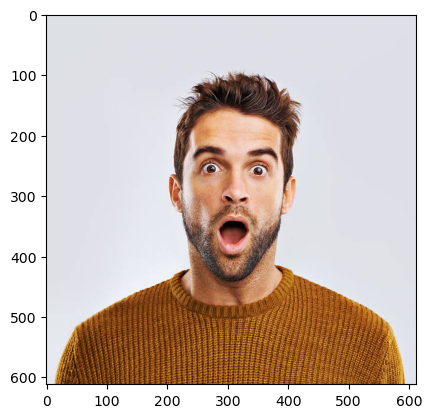

In [143]:
plt.imshow(np.asarray(frame))
plt.show

In [144]:
# face detector - haarcascade_frontalface_default
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')

In [145]:
gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY) # converting to gray level

In [146]:
faces = faceCascade.detectMultiScale(gray, 1.1, 4) # finding all the faces
for x,y,w,h in faces:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = frame[y:y+h, x:x+w]
    cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
    faces = faceCascade.detectMultiScale(roi_gray)
    if len(faces)==0:
        print("Face not detected")
    else:
        for(ex,ey,ew,eh) in faces:
            face_roi = roi_color[ey: ey+eh, ex: ex + ew]

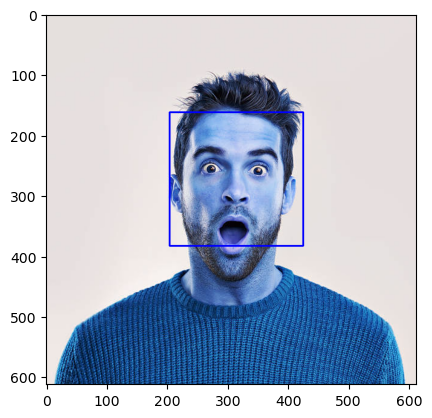

In [147]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
# plt.imshow(frame)

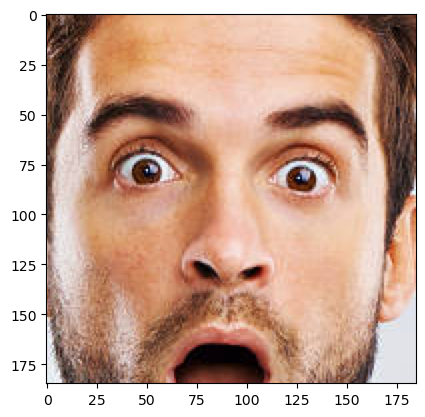

In [148]:
plt.imshow(face_roi)

In [149]:
face_roi.shape # img size - 110 x 110. Need to resize it

(185, 185, 3)

In [150]:
gray = cv2.cvtColor(face_roi, cv2.COLOR_BGR2GRAY)

In [151]:
gray.shape

(185, 185)

In [152]:
# As FER2013 uses 48 x 48 img size, need to resize to that
final_image = cv2.resize(gray, (48,48))

In [153]:
final_image.shape

(48, 48)

In [154]:
# Need 4th Dimension for COnvolution operation.
# 1st expanding to 3D
final_image = np.expand_dims(final_image,axis=0) 

In [155]:
final_image.shape

(1, 48, 48)

In [156]:
# Now expanding to 4th Dim
final_image = np.expand_dims(final_image,axis=0) 

In [157]:
final_image.shape

(1, 1, 48, 48)

In [158]:
# Normalization
final_image = final_image/255.0

In [159]:
data = torch.from_numpy(final_image)

In [160]:
data = data.type(torch.FloatTensor) # From Numpy, bringing it to Tensor

In [161]:
data = data.to(device) # move the image to device

In [162]:
outputs = net(data)
pred = F.softmax(outputs, dim=1)

In [163]:
print(pred)

tensor([[0.0479, 0.0026, 0.2499, 0.0241, 0.0813, 0.3980, 0.1961]],
       grad_fn=<SoftmaxBackward0>)


In [164]:
conf, classes = torch.max(pred, 1)

In [165]:
print(conf) # Accuracy

tensor([0.3980], grad_fn=<MaxBackward0>)


In [166]:
print(torch.argmax(pred))

tensor(5)


#### Emotions: [0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral]

## Live Webcam Demo

In [6]:
path = "haarcascade_frontalface_default.xml"
font_scale = 1.5
font = cv2.FONT_HERSHEY_PLAIN

# set the rectangle bg to white
rectangle_bgr = (255,255,255)
# make a black image
img = np.zeros((500,500))
# set some text
text = "Some text in a box"

# get the width and height of the text box
(text_width, text_height) = cv2.getTextSize(text,font, fontScale=font_scale,thickness=1)[0]
# set the text start position
text_offset_x = 10
text_offset_y = img.shape[0]-25
# make the coordinates of the box with a small padding of two pixels
box_coords = ((text_offset_x, text_offset_y),(text_offset_x+text_width+2,text_offset_y - text_height-2))
cv2.rectangle(img, box_coords[0], box_coords[1], rectangle_bgr, cv2.FILLED)
cv2.putText(img, text, (text_offset_x,text_offset_y),font,fontScale=font_scale, color=(0,0,0), thickness=1 )



array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [131]:
import mediapipe as mp
mp_face_detection = mp.solutions.face_detection
mp_drawing = mp.solutions.drawing_utils

In [7]:

# cap = cv2.VideoCapture('angry_video.mp4')
# cap = cv2.VideoCapture('Ronaldo_interview.mp4')
# cap = cv2.VideoCapture('happy_video1.mp4')
cap = cv2.VideoCapture(0)
# cap = cv2.VideoCapture('fear_video.mp4')
# check if the webcam is opened correctly
# if not cap.isOpened():
#     cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")

while True:
    ret, frame = cap.read()
    # face detector - haarcascade_frontalface_default
    faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')
    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY) # converting to gray level
    faces = faceCascade.detectMultiScale(gray, 1.1, 4) # finding all the faces
    for x,y,w,h in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
        faces = faceCascade.detectMultiScale(roi_gray)
        if len(faces)==0:
            print("Face not detected")
        else:
            for(ex,ey,ew,eh) in faces:
                face_roi = roi_color[ey: ey+eh, ex: ex + ew]
    graytemp = cv2.cvtColor(face_roi, cv2.COLOR_BGR2GRAY)
    # As FER2013 uses 48 x 48 img size, need to resize to that
    final_image = cv2.resize(graytemp, (48,48))
    # Now expanding to 4th Dim
    final_image = np.expand_dims(final_image,axis=0) # Add 3rd dim
    final_image = np.expand_dims(final_image,axis=0) # Add 4th dim
    # Normalization
    final_image = final_image/255.0
    data = torch.from_numpy(final_image)
    data = data.type(torch.FloatTensor) # From Numpy, bringing it to Tensor
    data = data.to(device) # move the image to device
    outputs = net(data)
    pred = F.softmax(outputs, dim=1)
    conf, classes = torch.max(pred, 1)
    predictions = torch.argmax(pred)
    print(predictions)

    font = cv2.FONT_HERSHEY_SIMPLEX
    font_scale=1.5
    font = cv2.FONT_HERSHEY_PLAIN

    if((predictions==0) and conf>0.5):
        status = 'Angry'

        x1,y1,w1,h1 = 0,0,175,175

        # Draw black banckground rectangle
        cv2.rectangle(frame, (x1,x1), (x1+w1,y1+h1),(0,0,0),-1)
        # Add text
        cv2.putText(frame, status, (x1+int(w1/10),y1+int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255),2)

        cv2.putText(frame,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255))

    elif((predictions==1) and conf>0.5):
        status = 'Disgust'

        x1,y1,w1,h1 = 0,0,175,175

        # Draw black banckground rectangle
        cv2.rectangle(frame, (x1,x1), (x1+w1,y1+h1),(0,0,0),-1)
        # Add text
        cv2.putText(frame, status, (x1+int(w1/10),y1+int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255),2)

        cv2.putText(frame,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255))

    elif((predictions==2) and conf>0.5):
        status = 'Fear'

        x1,y1,w1,h1 = 0,0,175,175

        # Draw black banckground rectangle
        cv2.rectangle(frame, (x1,x1), (x1+w1,y1+h1),(0,0,0),-1)
        # Add text
        cv2.putText(frame, status, (x1+int(w1/10),y1+int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255),2)

        cv2.putText(frame,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255))

    elif((predictions==3) and conf>0.5):
        status = 'Happy'

        x1,y1,w1,h1 = 0,0,175,175

        # Draw black banckground rectangle
        cv2.rectangle(frame, (x1,x1), (x1+w1,y1+h1),(0,0,0),-1)
        # Add text
        cv2.putText(frame, status, (x1+int(w1/10),y1+int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255),2)

        cv2.putText(frame,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255))

    elif((predictions==4) and conf>0.5):
        status = 'Sad'

        x1,y1,w1,h1 = 0,0,175,175

        # Draw black banckground rectangle
        cv2.rectangle(frame, (x1,x1), (x1+w1,y1+h1),(0,0,0),-1)
        # Add text
        cv2.putText(frame, status, (x1+int(w1/10),y1+int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255),2)

        cv2.putText(frame,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255))

    elif((predictions==5) and conf>0.5):
        status = 'Surprised'

        x1,y1,w1,h1 = 0,0,175,175

        # Draw black banckground rectangle
        cv2.rectangle(frame, (x1,x1), (x1+w1,y1+h1),(0,0,0),-1)
        # Add text
        cv2.putText(frame, status, (x1+int(w1/10),y1+int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255),2)

        cv2.putText(frame,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255))

    elif((predictions==6) and conf>0.5):
        status = 'Neutral'

        x1,y1,w1,h1 = 0,0,175,175

        # Draw black banckground rectangle
        cv2.rectangle(frame, (x1,x1), (x1+w1,y1+h1),(0,0,0),-1)
        # Add text
        cv2.putText(frame, status, (x1+int(w1/10),y1+int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255),2)

        cv2.putText(frame,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255))

# 
    cv2.imshow('Face Emotion Recognition',frame)

    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

C:\Users\ASUS\AppData\Roaming\Python\Python39\site-packages\torch\nn\functional.py:4277: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(
C:\Users\ASUS\AppData\Roaming\Python\Python39\site-packages\torch\nn\functional.py:4215: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(


tensor(0)
tensor(6)
tensor(6)
tensor(6)
tensor(4)
tensor(4)
tensor(1)
tensor(6)
tensor(6)
Face not detected
tensor(6)
tensor(6)
tensor(6)
tensor(4)
tensor(0)
tensor(4)
tensor(4)
tensor(4)
tensor(6)
tensor(6)
Face not detected
tensor(4)
tensor(4)
Face not detected
tensor(4)
tensor(4)
tensor(4)
tensor(1)
tensor(6)
tensor(1)
tensor(4)
tensor(1)
tensor(4)
tensor(4)
tensor(4)
tensor(4)
tensor(2)
tensor(0)
tensor(4)
tensor(3)
tensor(4)
tensor(1)
tensor(4)
tensor(3)
tensor(1)
Face not detected
tensor(3)
tensor(3)
tensor(3)
tensor(3)
tensor(0)
tensor(3)
tensor(3)
tensor(3)
tensor(3)
tensor(1)
tensor(3)
tensor(2)
tensor(4)
tensor(4)
tensor(1)
tensor(0)
tensor(4)
tensor(1)
tensor(1)
tensor(0)
tensor(3)
tensor(0)
tensor(0)
tensor(4)
tensor(4)
tensor(1)
tensor(4)
tensor(4)
tensor(4)
tensor(4)
tensor(4)
tensor(1)
tensor(3)
tensor(1)
tensor(4)
Face not detected
tensor(1)
tensor(4)
tensor(4)
tensor(0)
tensor(4)
Face not detected
tensor(4)
Face not detected
tensor(3)
tensor(6)
tensor(6)
Face not detec

In [18]:
cap.release()
cv2.destroyAllWindows()